In [ ]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
pd.set_option('display.max_rows', 500)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 4gphone.csv to 4gphone (1).csv


In [ ]:
df = pd.read_csv('4gphone.csv')

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,8,2,15,1,1,0,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004.0,1654,1067,17,1,10,1,0,0,0
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381.0,1018,3220,13,8,18,1,0,1,1
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512.0,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386.0,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137.0,1224,513,19,10,12,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   object 
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      1959 non-null   float64
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.0,1.00,1.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0


In [ ]:
df['clock_speed'].value_counts()

0.5    412
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2       67
1.9     65
0.7     64
2.9     62
1.8     62
1       61
1.7     60
2.2     59
0.9     58
2.4     57
0.8     57
1.2     56
2.7     55
2.6     55
1.1     51
3       28
x        3
Name: clock_speed, dtype: int64

In [ ]:
df.clock_speed = df['clock_speed'].str.replace('x','NaN').astype(float)

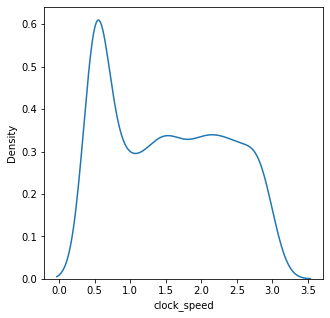

In [ ]:
plt.figure(figsize=(5,5))
sns.kdeplot(df['clock_speed'])
plt.xlabel('clock_speed')
plt.show()

In [ ]:
df.apply(lambda x : sum(x.isnull()))

battery_power     0
blue              0
clock_speed       3
dual_sim          0
fc                0
four_g            0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
pc                0
px_height        41
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price             0
dtype: int64

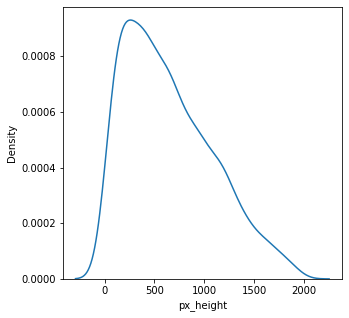

In [ ]:
plt.figure(figsize=(5,5))
sns.kdeplot(df['px_height'])
plt.xlabel('px_height')
plt.show()

In [ ]:
df['px_height'] = df['px_height'].fillna(df['px_height'].median())
df['clock_speed'] = df['clock_speed'].fillna(df['clock_speed'].median())

In [ ]:
df.apply(lambda x : sum(x.isnull()))

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price            0
dtype: int64

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
df_autoviz = AV.AutoViz('4gphone.csv', depVar='price')

In [24]:
import sweetviz as sv
sweetviz_report = sv.analyze(df)
sweetviz_report.show_html('sweetviz_report.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated.


In [ ]:
import IPython
IPython.display.HTML('sweetviz_report.html')

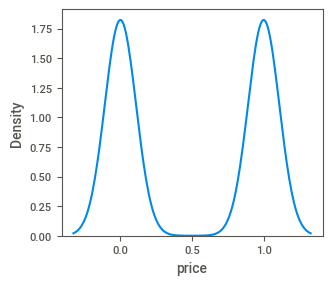

In [69]:
plt.figure(figsize=(3,3))
sns.kdeplot(df['price'])
plt.xlabel('price')
plt.show()

import seaborn as sns

import matplotlib.pyplot as plt

corr=df.corr()

fig = plt.figure(figsize=(15,12))

r = sns.heatmap(corr, cmap='Purples')

r.set_title("Correlation ")

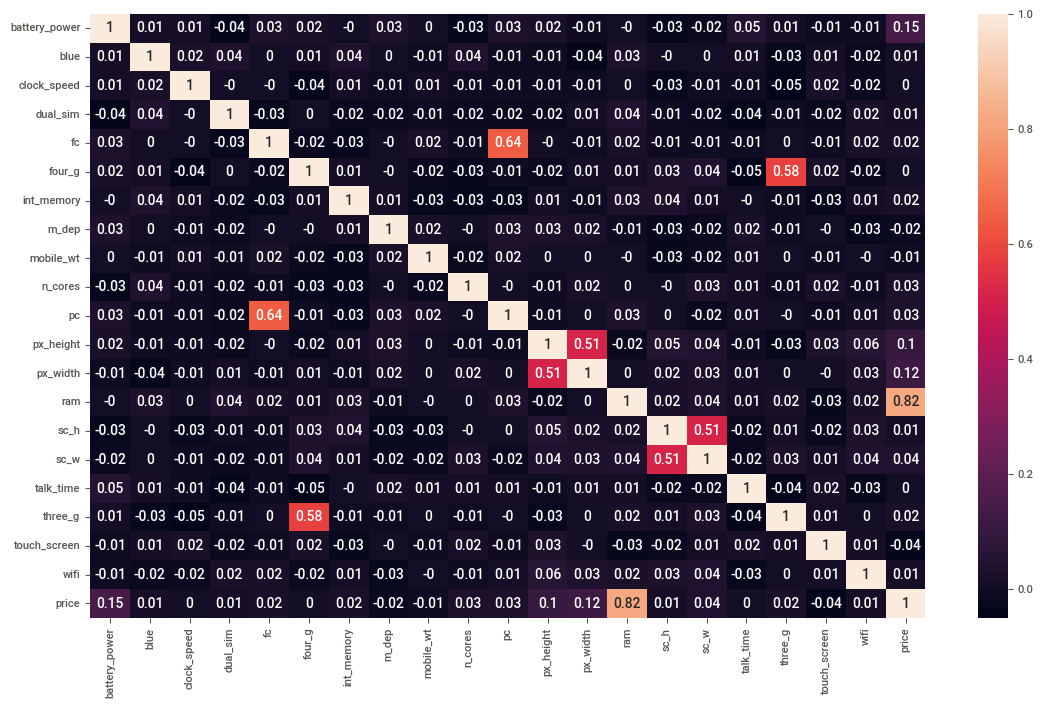

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(round(df.corr(),2), annot=True)
plt.show()

In [27]:
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[21:35:2]*100

price     ram              82.235428
fc        pc               64.459528
three_g   four_g           58.424556
px_width  px_height        50.722749
sc_w      sc_h             50.614421
price     battery_power    14.940190
          px_width         11.670332
dtype: float64

In [28]:
corr.sort_values(by=["price"],ascending=False).iloc[0].sort_values(ascending=False)

price            1.000000
ram              0.822354
battery_power    0.149402
px_width         0.116703
px_height        0.097135
sc_w             0.035359
n_cores          0.031260
pc               0.027628
three_g          0.024638
fc               0.022464
int_memory       0.022132
wifi             0.014001
blue             0.014001
sc_h             0.009140
dual_sim         0.009002
talk_time        0.004394
clock_speed      0.004233
four_g           0.001001
mobile_wt       -0.007968
m_dep           -0.018554
touch_screen    -0.040001
Name: price, dtype: float64

Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

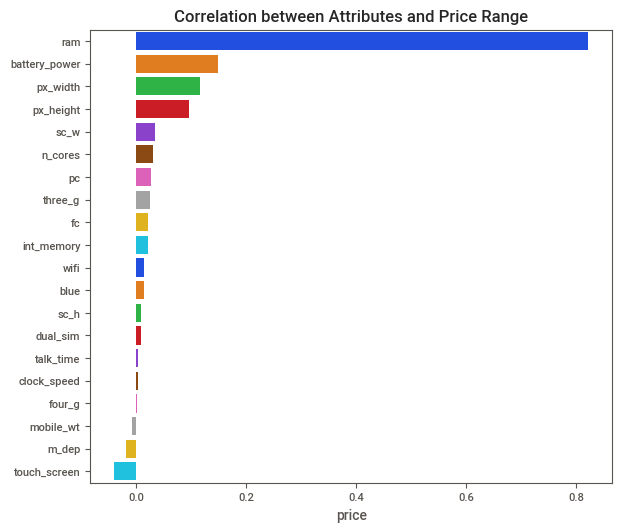

In [60]:
correlations = df.corr()['price']
cr = correlations.sort_values(ascending = False)[1:]
plt.figure(figsize=(6, 6))
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation between Attributes and Price Range")

------------>Analysis of Attributes<------------



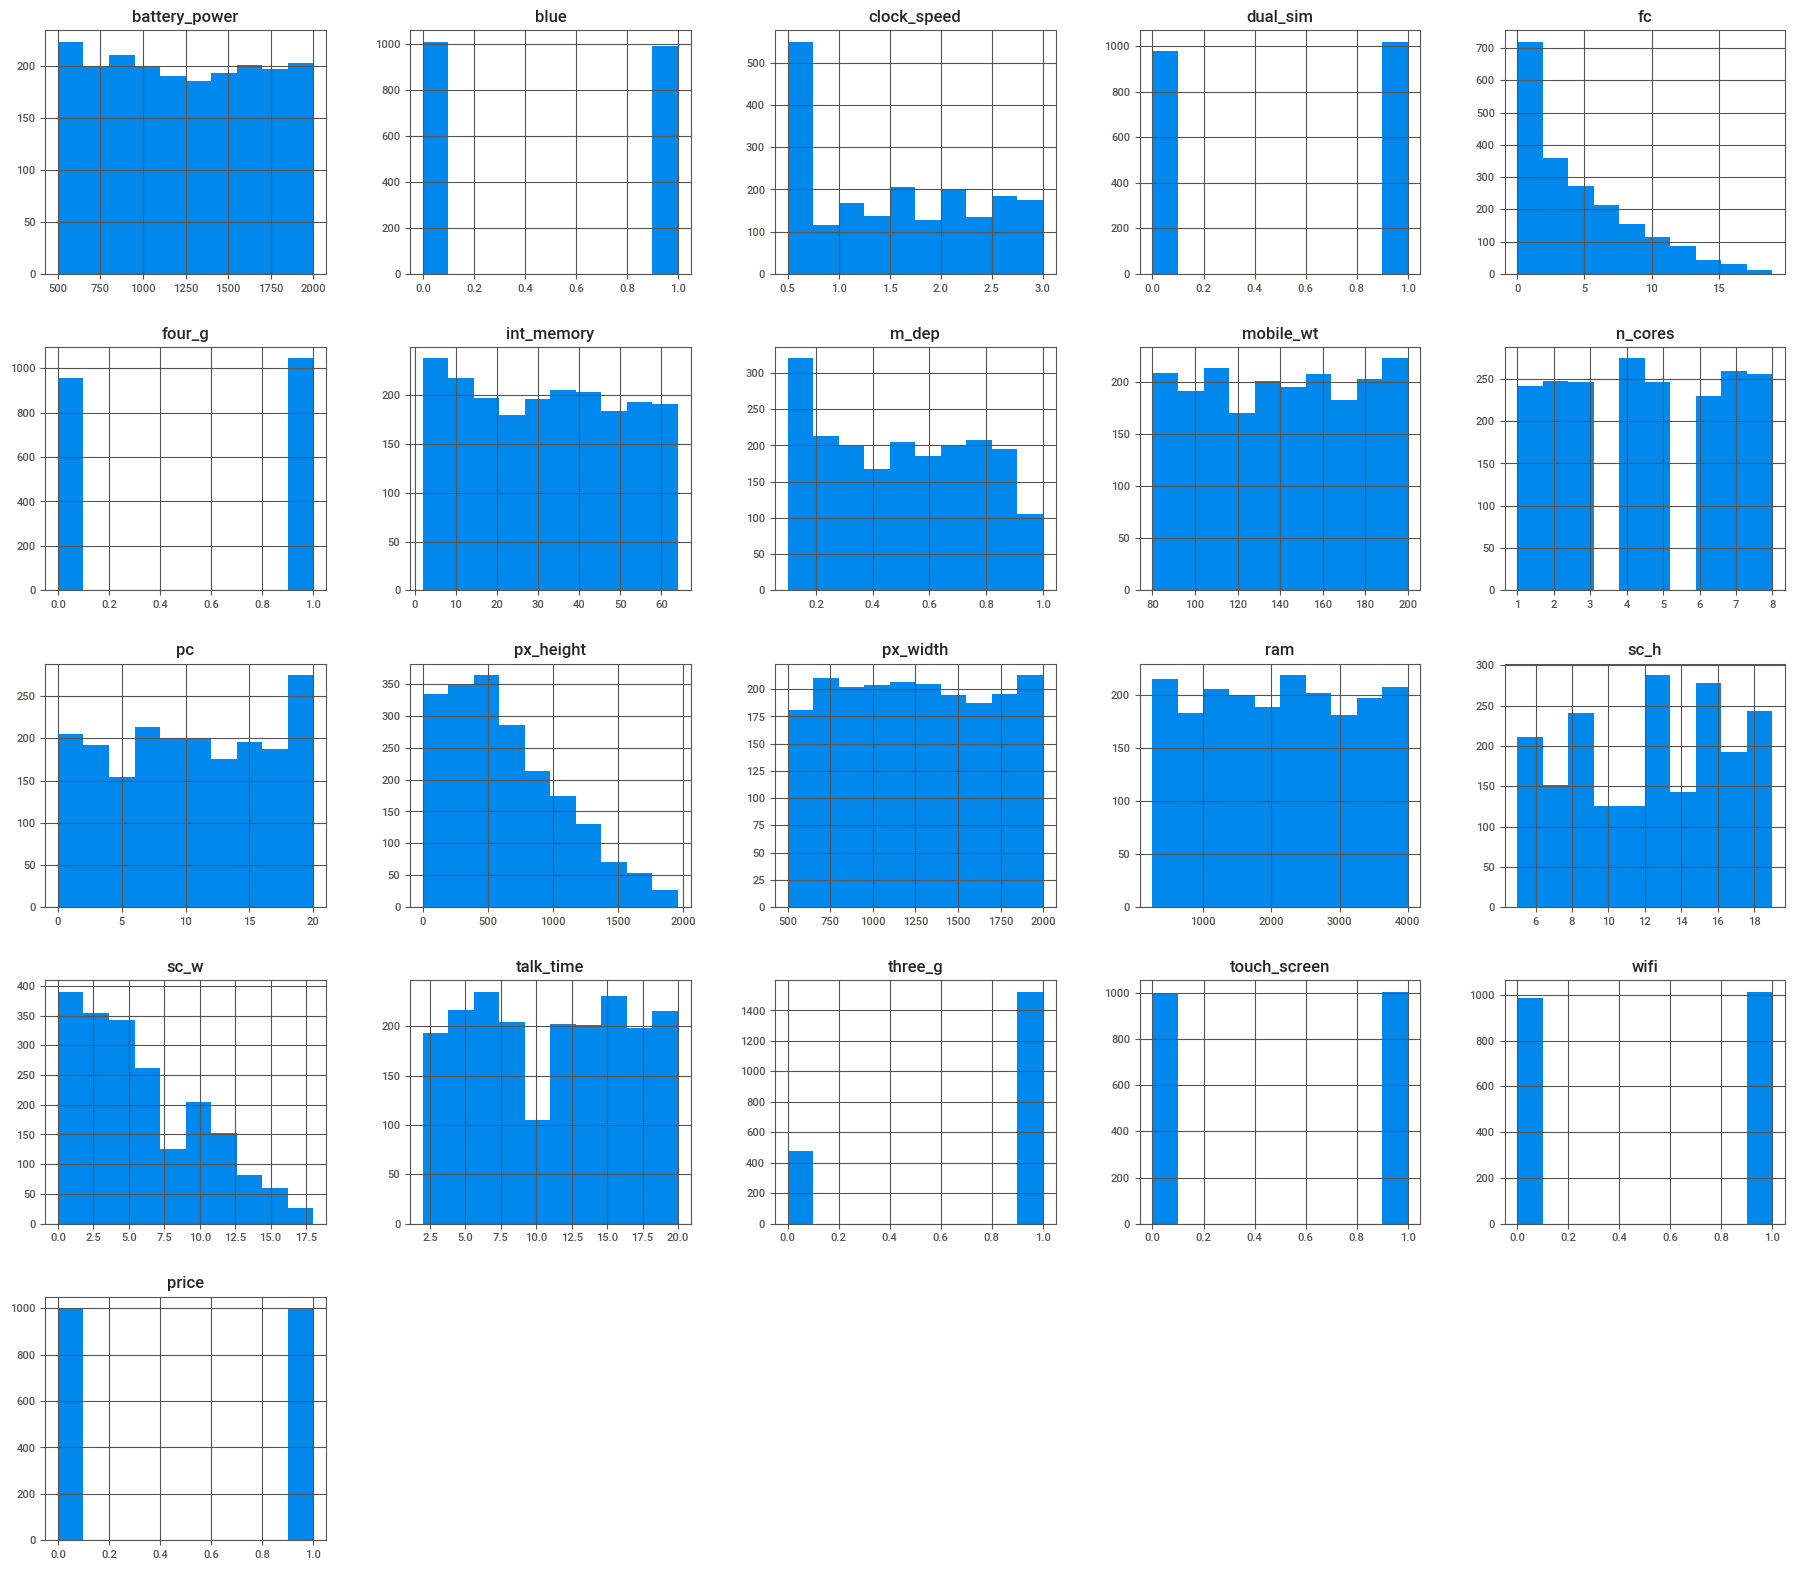

In [72]:
#data visualization drawing histogram
print("------------>Analysis of Attributes<------------")
print()
df.hist(sharex=False, sharey=False, figsize=(20,20) )
plt.show()

<Figure size 500x500 with 0 Axes>

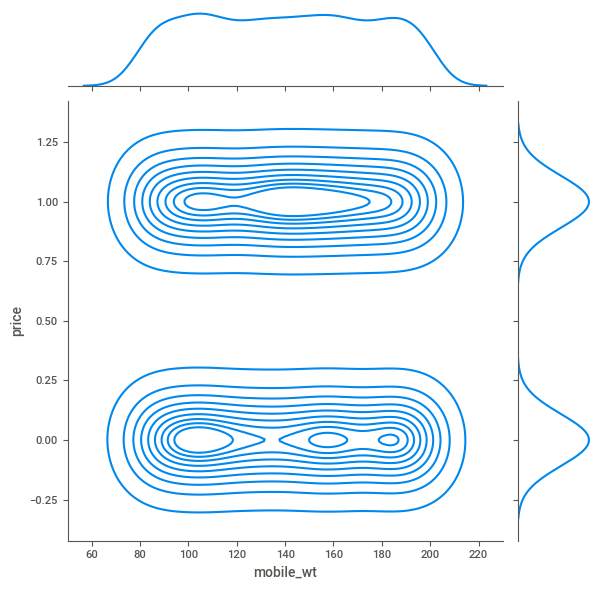

In [74]:
plt.figure(figsize=(5, 5))
sns.jointplot(x='mobile_wt',y='price',data=df,kind='kde');

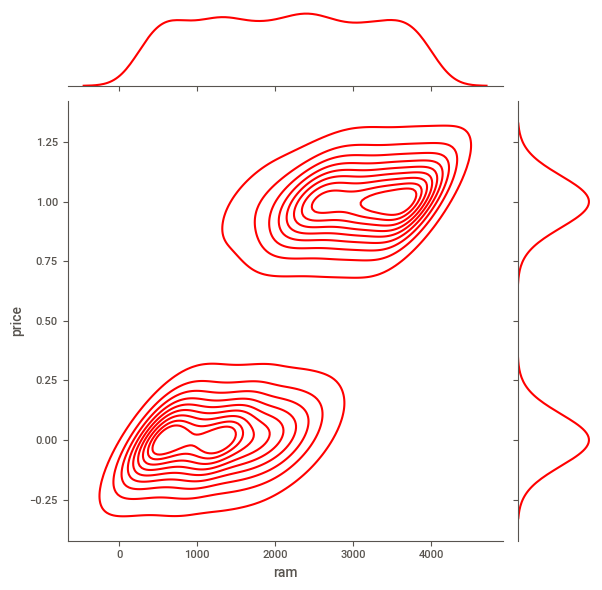

In [32]:
sns.jointplot(x='ram',y='price',data=df,color='red',kind='kde');

<AxesSubplot:xlabel='price', ylabel='int_memory'>

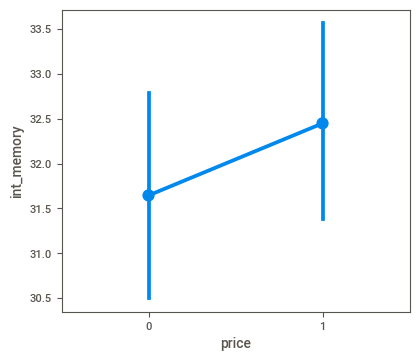

In [75]:
plt.figure(figsize=(4,4))
sns.pointplot(y="int_memory", x="price", data=df)

Text(0.5, 0, 'MegaPixels')

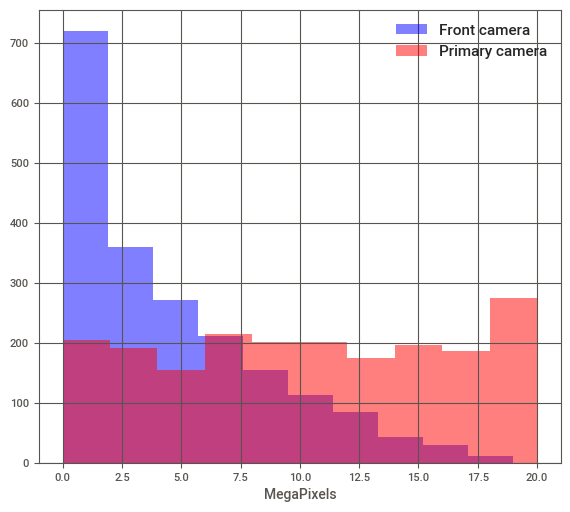

In [57]:
plt.figure(figsize=(6,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

<AxesSubplot:xlabel='price', ylabel='battery_power'>

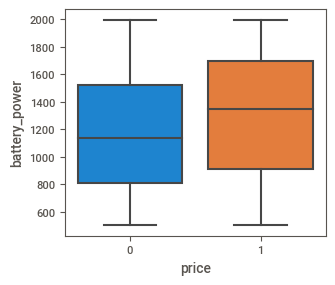

In [76]:
plt.figure(figsize=(3,3))
sns.boxplot(x="price", y="battery_power", data = df)

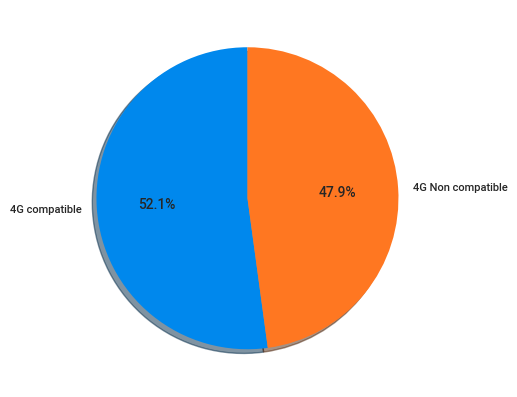

In [77]:
labels4g = ["4G compatible",'4G Non compatible']
values4g = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [37]:
df1 = df.copy()

In [38]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(df1)
scaled = scaler.transform(df1)
scaled_df = pd.DataFrame(scaled, columns=df1.columns)

In [39]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   float64
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   float64
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   float64
 18  touch_sc

In [40]:
X = scaled_df.drop(columns='price')
y = scaled_df.price

In [41]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)
chi_scores

(array([3.48163422e+00, 1.97979798e-01, 5.21130923e-03, 7.94896958e-02,
        2.32198142e-01, 9.58772771e-04, 1.57195647e-01, 1.14090683e-01,
        5.67020086e-03, 2.82725915e-01, 2.82924923e-01, 2.87903288e+00,
        2.03383600e+00, 1.87298713e+02, 1.26783664e-02, 4.56929272e-01,
        5.23113250e-03, 2.89560079e-01, 1.59045726e+00, 1.93293886e-01]),
 array([6.20534299e-02, 6.56356460e-01, 9.42451182e-01, 7.77990154e-01,
        6.29898707e-01, 9.75298205e-01, 6.91751650e-01, 7.35534165e-01,
        9.39975436e-01, 5.94920096e-01, 5.94790496e-01, 8.97399046e-02,
        1.53831911e-01, 1.23590571e-42, 9.10349071e-01, 4.99062590e-01,
        9.42342021e-01, 5.90502580e-01, 2.07260817e-01, 6.60189169e-01]))

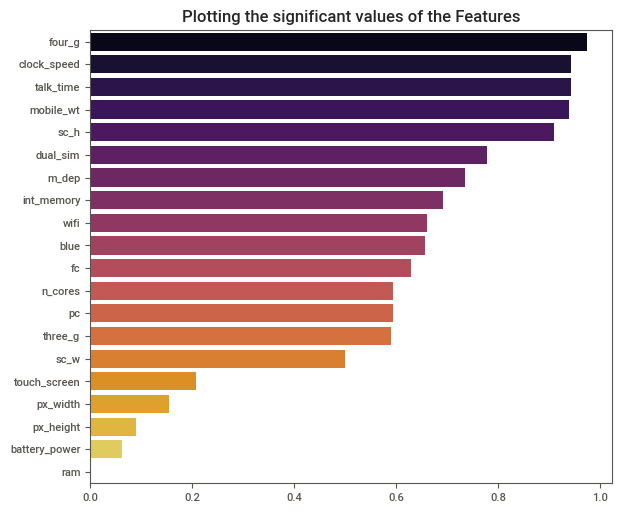

In [156]:
#plotting the p-values
plt.figure(figsize=(6,6))
plt.yticks((0, 0.05, 0.5, 1))
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
#p_values.plot.bar()
ax = sns.barplot(x=p_values, y=p_values.index,palette = "inferno")
ax.set_title('Plotting the significant values of the Features');

In [43]:
#only 5 variables seems significant sc_w, touch_screen, px_width, px_height, battery_power, ram <0.05

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [140]:
#shape of dataset
y_train.shape, y_test.shape

((1400,), (600,))

In [141]:
#actual dataset ratio of for each class in training set
y_train.value_counts()/len(y_train)

1.0    0.5
0.0    0.5
Name: price, dtype: float64

In [199]:
model = list()
precision = list()
recall = list()
F1score = list()

def test_eval(clf_model, X_test, y_test, algo=None):    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred,average='weighted')*100)
    recall.append(recall_score(y_test,y_pred,average='weighted'))
    F1score.append(f1_score(y_test,y_pred,average='weighted'))

#Model - Logistic Regression

In [161]:
logit_model = sm.Logit(y_train,X_train) 
logit_fit = logit_model.fit()
print(logit_fit.summary())

Optimization terminated successfully.
         Current function value: 0.208348
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  price   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1380
Method:                           MLE   Df Model:                           19
Date:                Sat, 19 Mar 2022   Pseudo R-squ.:                  0.6994
Time:                        01:12:52   Log-Likelihood:                -291.69
converged:                       True   LL-Null:                       -970.41
Covariance Type:            nonrobust   LLR p-value:                1.715e-276
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
battery_power     2.5196      0.473      5.324      0.000       1.592       3.447
blue             -0.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression(random_state = 1, solver='lbfgs')

logreg.fit(X_train,y_train)

y_pred_test = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)*100),'%')

import sklearn.metrics as metrics
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print (cnf_matrix)

from sklearn.metrics import precision_score, recall_score
print (classification_report(y_test, y_pred))

Model accuracy score: 96.1667 %
[[294   6]
 [ 17 283]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       300
         1.0       0.98      0.94      0.96       300

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



Logistic regression with best parameters

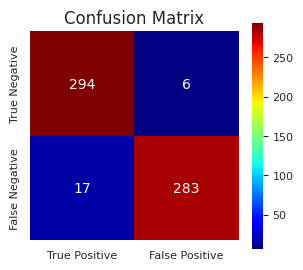

In [94]:
labels_1 = ['True Positive', 'False Positive']
labels_2 = ['True Negative', 'False Negative']
with sns.axes_style('white'):
    plt.figure()
    ax = sns.heatmap(cnf_matrix, square=True, xticklabels=labels_1, yticklabels=labels_2, annot=True, cmap=plt.cm.jet, fmt='.00f')
    plt.title("Confusion Matrix")
    plt.rcParams["figure.figsize"] = (3,3)

In [200]:
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : [0.001,0.01,0.1,1,10,100,1000],
    'solver' : ['liblinear']},
]

In [201]:
#Instantiate object
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(),param_grid,verbose=1,cv=3,n_jobs=-1)

In [202]:
#Fit to find the best combo of params
grid.fit(X_train,y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             verbose=1)

In [203]:
#Show the best params to use
lr_params = grid.best_params_
lr_params

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [204]:
#Print reports
test_eval(grid, X_test, y_test, 'Logistic Regression')

Confusion Matrix
[[295   5]
 [ 10 290]] 

Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       300
         1.0       0.98      0.97      0.97       300

    accuracy                           0.97       600
   macro avg       0.98      0.97      0.97       600
weighted avg       0.98      0.97      0.97       600
 



[[295   5]
 [ 10 290]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       300
         1.0       0.98      0.97      0.97       300

    accuracy                           0.97       600
   macro avg       0.98      0.97      0.97       600
weighted avg       0.98      0.97      0.97       600



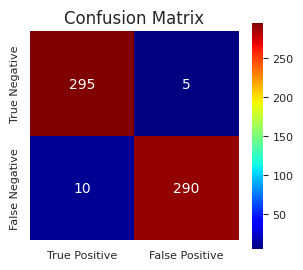

In [205]:
import sklearn.metrics as metrics
y_pred1 = grid.predict(X_test)
cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred1)
print (cnf_matrix1)

from sklearn.metrics import precision_score, recall_score
print (classification_report(y_test, y_pred1))

with sns.axes_style('white'):
    plt.figure()
    ax = sns.heatmap(cnf_matrix1, square=True, xticklabels=labels_1, yticklabels=labels_2, annot=True, cmap=plt.cm.jet, fmt='.00f')
    plt.title("Confusion Matrix")
    plt.rcParams["figure.figsize"] = (3,3)

In [206]:
#-----------------------------------------------------------------------------------------------------

# Model - SVM

In [207]:
#Provide a dictionary of these values to test
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

In [208]:
#Instantiate object
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
grid = GridSearchCV(SVC(probability=True, decision_function_shape='ovr'),param_grid,verbose=1,cv=3,n_jobs=-1)

In [209]:
#Fit to find the best combo of params
grid.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['poly']}],
             verbose=1)

In [210]:
#Show the best params to use
svc_params = grid.best_params_
svc_params

{'C': 1000, 'kernel': 'linear'}

In [211]:
#Print reports
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
test_eval(grid, X_test, y_test, 'SVC')

Confusion Matrix
[[294   6]
 [ 14 286]] 

Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       300
         1.0       0.98      0.95      0.97       300

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600
 



[[294   6]
 [ 14 286]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       300
         1.0       0.98      0.95      0.97       300

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



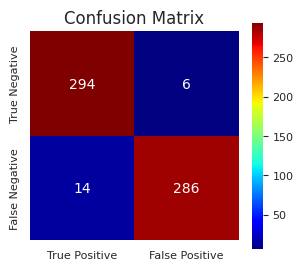

In [212]:
import sklearn.metrics as metrics
y_pred2 = grid.predict(X_test)
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
print (cnf_matrix2)

from sklearn.metrics import precision_score, recall_score
print (classification_report(y_test, y_pred2))

with sns.axes_style('white'):
    plt.figure()
    ax = sns.heatmap(cnf_matrix2, square=True, xticklabels=labels_1, yticklabels=labels_2, annot=True, cmap=plt.cm.jet, fmt='.00f')
    plt.title("Confusion Matrix")
    plt.rcParams["figure.figsize"] = (3,3)

In [213]:
clf_eval_df = pd.DataFrame({'model':model,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score})

clf_eval_df

,model,precision,recall,f1-score
0,Logistic Regression,97.513198,0.975000,0.974998
1,SVC,96.699875,0.966667,0.966661


In [115]:
def plot_accuracy(parameters,train_acc,test_acc,title,xlab,ylab):
    plt.plot(parameters,train_acc,marker='o',markersize=5,color='black',label='train')
    plt.plot(parameters,test_acc,marker='o',markersize=5,color='purple',label='test')
    plt.title(title)
    plt.xlabel(xlab)
    plt.grid()
    plt.ylabel(ylab)
    plt.legend(loc='upper right')
    plt.show()

In [116]:
def plot_runtime(parameters,run_time,title,xlab,ylab):
    plt.plot(parameters,run_time,marker='o',markersize=5,color='green')
    plt.title(title)
    plt.xlabel(xlab)
    plt.grid()
    plt.ylabel(ylab)
    plt.show()

In [117]:
import time

kernels = ['linear', 'poly', 'rbf','sigmoid']
ker_acc_train = []
ker_acc_test = []
ker_run_time = []
for i in range(0, len(kernels)):
    start_time = time.time()
    SVM=SVC(kernel= kernels[i],random_state=5)
    SVM.fit(X_train,y_train)
    end_time = time.time()
    run_time = end_time - start_time
    y_train_pred = SVM.predict(X_train)
    y_test_pred = SVM.predict(X_test)
    sc1=accuracy_score(y_train,y_train_pred)
    sc2=accuracy_score(y_test,y_test_pred)
    ker_acc_train.append(sc1)
    ker_acc_test.append(sc2)
    ker_run_time.append(run_time)

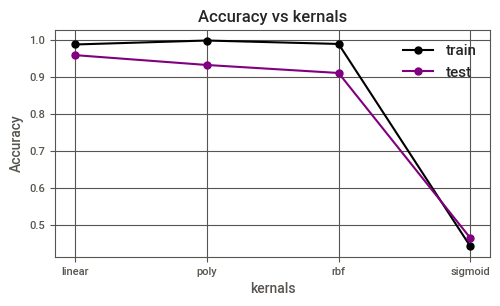

In [123]:
plt.figure(figsize=(5,3))
plot_accuracy(kernels,ker_acc_train,ker_acc_test,"Accuracy vs kernals","kernals","Accuracy")

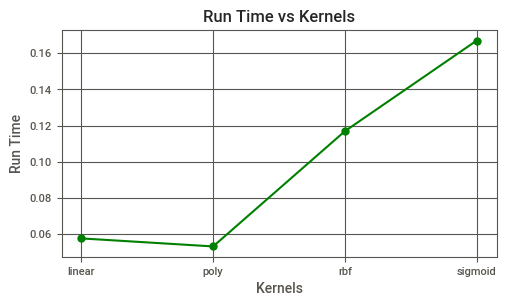

In [124]:
plt.figure(figsize=(5,3))
plot_runtime(kernels,ker_run_time,'Run Time vs Kernels','Kernels','Run Time')